Question 1

Predict House Prices using Regression to a Small dataset.
Implement Linear Regression Python
plot cost convergence
compare with sklearn.
Goal: regression + cost minimization.

Load the data set Clean the Data

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import pandas as pd

df = pd.read_excel(r"House-Prices.xlsx")

print("Original Data:\n", df)


df['Size'] = df['Size'].fillna(df['Size'].mean())
df['Price(Dollars)'] = df['Price(Dollars)'].fillna(df['Price(Dollars)'].mean())

print("\nCleaned Data:\n", df)


Original Data:
      Size  Price(Dollars)  age
0  1000.0        250000.0   10
1     NaN        300000.0    5
2  1400.0        340000.0   12
3  1600.0        400000.0    7
4  1800.0             NaN    8
5  2000.0        500000.0    9

Cleaned Data:
      Size  Price(Dollars)  age
0  1000.0        250000.0   10
1  1560.0        300000.0    5
2  1400.0        340000.0   12
3  1600.0        400000.0    7
4  1800.0        358000.0    8
5  2000.0        500000.0    9


Linear Regression using Gradient Descent manual method

Iteration 1: m=115.94666666666664, b=0.0716, cost=134377333333.33333
Iteration 2: m=173.17173517191108, b=0.10702462568000001, cost=33983867748.18808
Iteration 3: m=201.41496592996293, b=0.12459502290143862, cost=9529211959.699518
Iteration 4: m=215.35431284453296, b=0.1333535286122856, cost=3572348270.766581
Iteration 5: m=222.23402831707548, b=0.1377629563340856, cost=2121327028.8592858
Iteration 6: m=225.6294875804225, b=0.1400259119465668, cost=1767875488.6844373
Iteration 7: m=227.30530447560773, b=0.14122948381629258, cost=1681778891.4140522
Iteration 8: m=228.13239794265564, b=0.1419102005740062, cost=1660806782.7138467
Iteration 9: m=228.5406069539553, b=0.1423328640338575, cost=1655698225.9100516
Iteration 10: m=228.74207701891453, b=0.14262816619765065, cost=1654453841.9281158
Iteration 11: m=228.84151180577402, b=0.14286060964211608, cost=1654150724.5486803
Iteration 12: m=228.89058744085688, b=0.14306202938659265, cost=1654076888.5336752
Iteration 13: m=228.9148084941236, b

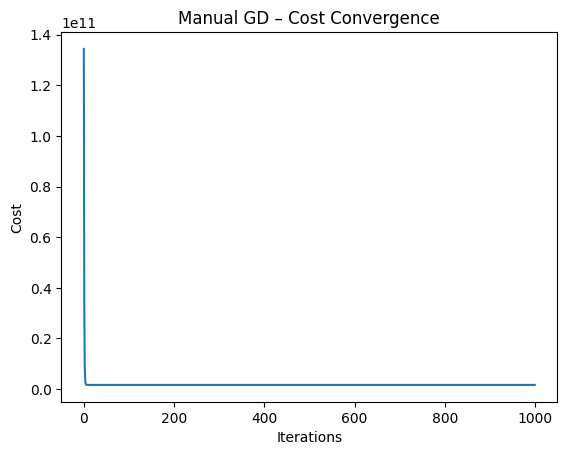

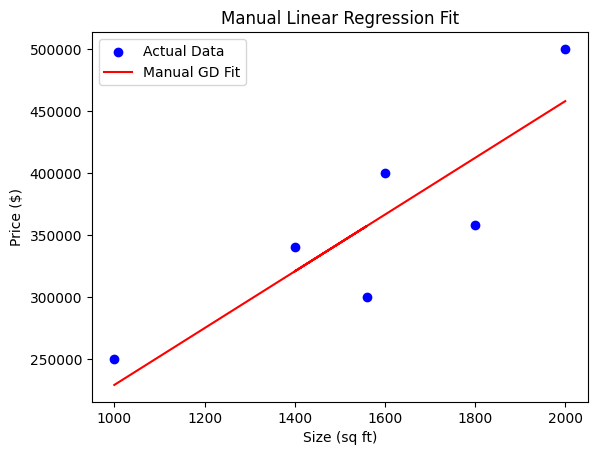

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = df['Size'].values
y = df['Price(Dollars)'].values


def gradient_descent(x, y):
    learning_rate=0.0000001
    iterations=1000
    m_curr = b_curr = 0
    n = len(x)
    costs = []


    for i in range(iterations):
        y_pred = m_curr * x + b_curr
        cost = (1/n) * np.sum((y - y_pred) ** 2)
        costs.append(cost)

        md = -(2/n) * np.sum(x * (y - y_pred))
        bd = -(2/n) * np.sum(y - y_pred)

        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print(f"Iteration {i+1}: m={m_curr}, b={b_curr}, cost={cost}")

    return m_curr, b_curr, costs


m, b, costs = gradient_descent(X, y)

print(f"Linear Regression: y = {m}x + {b}")

size_predict = 2500
predicted_price = m * size_predict + b

print(f"Predicted price  for 2500 sq ft house: {predicted_price}")

plt.plot(range(len(costs)), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Manual GD – Cost Convergence")
plt.show()

plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, m*X + b, color="red", label="Manual GD Fit")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Manual Linear Regression Fit")
plt.show()


Sklearn Linear Regression

Sklearn Linear Regression:
Coefficient (m): 215.4054
Intercept (b): 21967.5676
Predicted price for 2500 sq ft house: [560481.08108108]


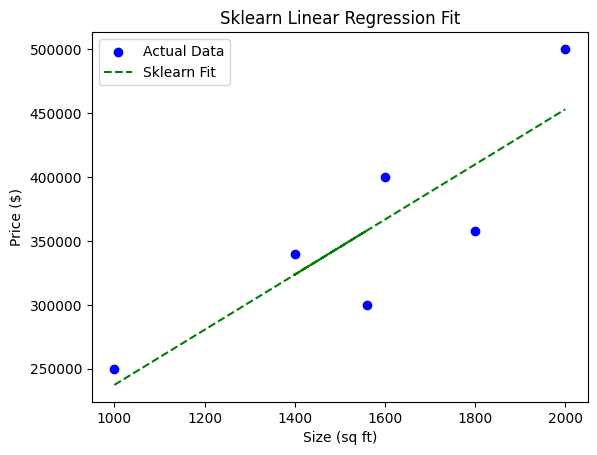

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = df['Size'].values
y = df['Price(Dollars)'].values
X_new = X.reshape(-1, 1)


model = LinearRegression()
model.fit(X_new, y)

print("Sklearn Linear Regression:")
print(f"Coefficient (m): {model.coef_[0]:.4f}")
print(f"Intercept (b): {model.intercept_:.4f}")

size_predict = np.array([[2500]])
predicted_price = model.predict(size_predict)

print(f"Predicted price for 2500 sq ft house: {predicted_price}")


y_pred_sklearn = model.predict(X_new)

plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred_sklearn, color="green", linestyle="--", label="Sklearn Fit")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Sklearn Linear Regression Fit")
plt.show()


Difference :

In manual gradient descent
we have to start with random guesses for m and b.Then update them step by step using the cost function.

In Sklearn linear regression:
uses the Normal Equation and gets the best fit line.

Question 02

Email Spam Classifier (Classification):
Dataset labeled Spam/Not Spam.
Extract simple features, train Logistic Regression, build Confusion Matrix,calculate metrics.
Goal: classification + evaluation.

In [23]:
from google.colab import files
uploaded = files.upload()

Saving spam.xlsx to spam.xlsx


In [24]:
import pandas as pd


df = pd.read_excel("spam.xlsx")

print("First few rows of dataset:")
print(df)


First few rows of dataset:
                            Email Text  contains_offer  contains_free  \
0               "Win a free offer now"               1              1   
1          "Meeting schedule attached"               0              0   
2           "Get free money instantly"               0              1   
3          "Project deadline tomorrow"               0              0   
4       "Exclusive offer just for you"               1              0   
5         "Claim your free gift today"               0              1   
6    "Salary credited to your account"               0              0   
7  "Important: free upgrade available"               0              1   
8              "Quarterly team report"               0              0   

   contains_money  contains_spamLabel  
0               0                   1  
1               0                   0  
2               1                   1  
3               0                   0  
4               0                   1  
5 

In [25]:

X = df[['contains_offer', 'contains_free', 'contains_money']]
y = df['contains_spamLabel']

Train/Test

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [28]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred.tolist())

Predictions: [1, 0, 1]


Confusion Matrix

Confusion Matrix:
 [[2 0]
 [0 1]]
TP=2, FN=0, FP=0, TN=1
Accuracy=1.00, Precision=1.00, Recall=1.00, F1=1.00

Sklearn Metrics:
Accuracy=1.00
Precision=1.00
Recall=1.00
F1=1.00


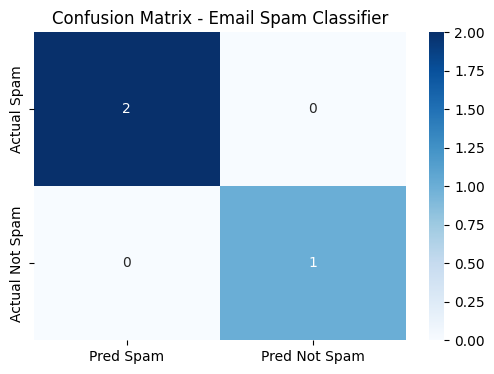

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
print("Confusion Matrix:\n", cm)

TP = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TN = cm[1,1]

print(f"TP={TP}, FN={FN}, FP={FP}, TN={TN}")

accuracy_manual = (TP+TN)/(TP+TN+FP+FN)
precision_manual = TP/(TP+FP) if (TP+FP)>0 else 0
recall_manual = TP/(TP+FN) if (TP+FN)>0 else 0
f1_manual = 2*(precision_manual*recall_manual)/(precision_manual+recall_manual) if (precision_manual+recall_manual)>0 else 0

print(f"Accuracy={accuracy_manual:.2f}, Precision={precision_manual:.2f}, Recall={recall_manual:.2f}, F1={f1_manual:.2f}")

print("\nSklearn Metrics:")
print(f"Accuracy={accuracy_score(y_test, y_pred):.2f}")
print(f"Precision={precision_score(y_test, y_pred, pos_label=1):.2f}")
print(f"Recall={recall_score(y_test, y_pred, pos_label=1):.2f}")
print(f"F1={f1_score(y_test, y_pred, pos_label=1):.2f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred Spam','Pred Not Spam'],
            yticklabels=['Actual Spam','Actual Not Spam'])
plt.title("Confusion Matrix - Email Spam Classifier")
plt.show()


Testing

In [30]:
sample_email = [[1,1,0]]
print("Prediction for sample email:", model.predict(sample_email))

Prediction for sample email: [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
